In [8]:
import pickle, pandas as pd, numpy as np

In [19]:
import xarray as xr

In [9]:
d=pickle.load(open('predictions.pkl','rb'))

In [10]:
d['true']=d['true'].astype(int)

In [11]:
d['embedding_primarycaps_aligned'].shape

(754, 78, 39, 15)

In [12]:
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA

In [60]:
d['embedding_primarycaps_aligned'].coords['primary_capsules']

<xarray.DataArray 'primary_capsules' (primary_capsules: 78)>
array(['chr1_900000_1800000', 'chr1_1800000_2700000', 'chr1_2700000_3600000',
       'chr10_900000_1800000', 'chr10_133200000_134100000',
       'chr10_134100000_135000000', 'chr11_0_900000', 'chr11_900000_1800000',
       'chr11_1800000_2700000', 'chr11_2700000_3600000',
       'chr11_63900000_64800000', 'chr11_64800000_65700000',
       'chr11_66600000_67500000', 'chr12_6300000_7200000',
       'chr12_52200000_53100000', 'chr12_54000000_54900000',
       'chr12_131400000_132300000', 'chr12_132300000_133200000',
       'chr13_112500000_113400000', 'chr13_113400000_114300000',
       'chr14_100800000_101700000', 'chr14_104400000_105300000',
       'chr14_105300000_106200000', 'chr15_25200000_26100000',
       'chr16_0_900000', 'chr16_900000_1800000', 'chr16_1800000_2700000',
       'chr16_2700000_3600000', 'chr16_84600000_85500000',
       'chr16_85500000_86400000', 'chr16_87300000_88200000',
       'chr16_88200000_89100000',

In [16]:
arr=np.stack([d['embedding_primarycaps_aligned'][i,:,d['true'][i],:] for i in range(d['embedding_primarycaps_aligned'].shape[0])])



<xarray.DataArray (sample: 754, primary_capsules: 78, output_capsules: 39)>
array([[[0.03087 , 0.024696, ..., 0.026206, 0.025222],
        [0.027099, 0.025277, ..., 0.025863, 0.025519],
        ...,
        [0.02266 , 0.025247, ..., 0.025777, 0.025321],
        [0.034111, 0.024753, ..., 0.025032, 0.024961]],

       [[0.03326 , 0.026287, ..., 0.026819, 0.025324],
        [0.049945, 0.024705, ..., 0.026657, 0.02496 ],
        ...,
        [0.021932, 0.026921, ..., 0.025281, 0.02552 ],
        [0.043397, 0.024684, ..., 0.025739, 0.025018]],

       ...,

       [[0.026502, 0.025622, ..., 0.026241, 0.022687],
        [0.026201, 0.024525, ..., 0.024922, 0.038323],
        ...,
        [0.025902, 0.025104, ..., 0.026573, 0.036425],
        [0.026879, 0.025238, ..., 0.024211, 0.026671]],

       [[0.025432, 0.025601, ..., 0.026031, 0.031455],
        [0.024294, 0.025046, ..., 0.024257, 0.057583],
        ...,
        [0.025746, 0.025056, ..., 0.027366, 0.022852],
        [0.023294, 0.023496,

In [25]:
list(zip(np.array(d['embedding_primarycaps_aligned'].dims)[[0,2,3]],arr.shape))

[('sample', 754), ('output_capsules', 78), ('z_primary', 15)]

In [27]:
arr=xr.DataArray(arr,dims=dict(list(zip(np.array(d['embedding_primarycaps_aligned'].dims)[[0,2,3]],arr.shape))))

In [45]:
arr2=np.stack([arr[d['true']==i].mean(axis=0) for i in range(d['embedding_primarycaps_aligned'].shape[2])])


In [189]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.offline as py

In [63]:
for i in range(d['embedding_primarycaps_aligned'].shape[2]):
    #print(d['true'][i])
    Y=pd.DataFrame(PCA(n_components=2,random_state=42).fit_transform(arr2[i]),columns=['x','y'])
    Y['capsule']=d['embedding_primarycaps_aligned'].coords['primary_capsules']
    #sns.scatterplot('x','y',data=Y)
    fig=px.scatter(Y,x='x',y='y',color='capsule')
    py.plot(fig,filename='{}.html'.format(i))

In [91]:
(y==0).sum()

47

In [70]:
arr.shape

(740, 78, 15)

In [104]:
X=np.stack([d['embedding_primarycaps_aligned'][i,:,d['true'][i],:] for i in range(d['embedding_primarycaps_aligned'].shape[0])])[d['true']==d['pred'].astype(int)]
W=d['routing_weights'][d['true']==d['pred'].astype(int)]
y=d['true'][d['true']==d['pred'].astype(int)]

In [194]:
def plot_corr(i):
    df=pd.DataFrame(W[y==i].sum(axis=0).values,index=d['routing_weights'].coords['primary_capsules'],columns=d['routing_weights'].coords['output_capsules'])
    #print(df)
    plt.figure()
    sns.heatmap(df.T)
    plt.savefig(d['routing_weights'].coords['output_capsules'].values[i]+'.routing.png',dpi=300)

In [195]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [200]:
sns.set(font_scale=0.4)

# for i in range(38):
#     
#i=39
#plot_corr(i)

In [140]:
def make_graph(i):
    Y=pd.DataFrame(PCA(n_components=2,random_state=42).fit_transform(X[i]),columns=['x','y'])
    Y['capsule']=d['embedding_primarycaps_aligned'].coords['primary_capsules']
    #sns.scatterplot('x','y',data=Y)
    fig=px.scatter(Y,x='x',y='y',color='capsule')
    py.plot(fig,filename='{}.html'.format(i))
    
    


In [226]:
def make_graph3(i):
    df=pd.DataFrame(G2[y==i].mean(0),index=d['embedding_primarycaps_aligned'].coords['primary_capsules'],columns=d['embedding_primarycaps_aligned'].coords['primary_capsules'])
    #sns.clustermap(df)
    return df

In [172]:
def make_graph2(i):
    df=pd.DataFrame(np.corrcoef(X[i]),index=d['embedding_primarycaps_aligned'].coords['primary_capsules'],columns=d['embedding_primarycaps_aligned'].coords['primary_capsules'])
    #     sns.clustermap(df)
    return df

In [227]:
G2=np.stack([make_graph2(i).values for i in range(740)])

In [228]:
G2.shape

(740, 78, 78)

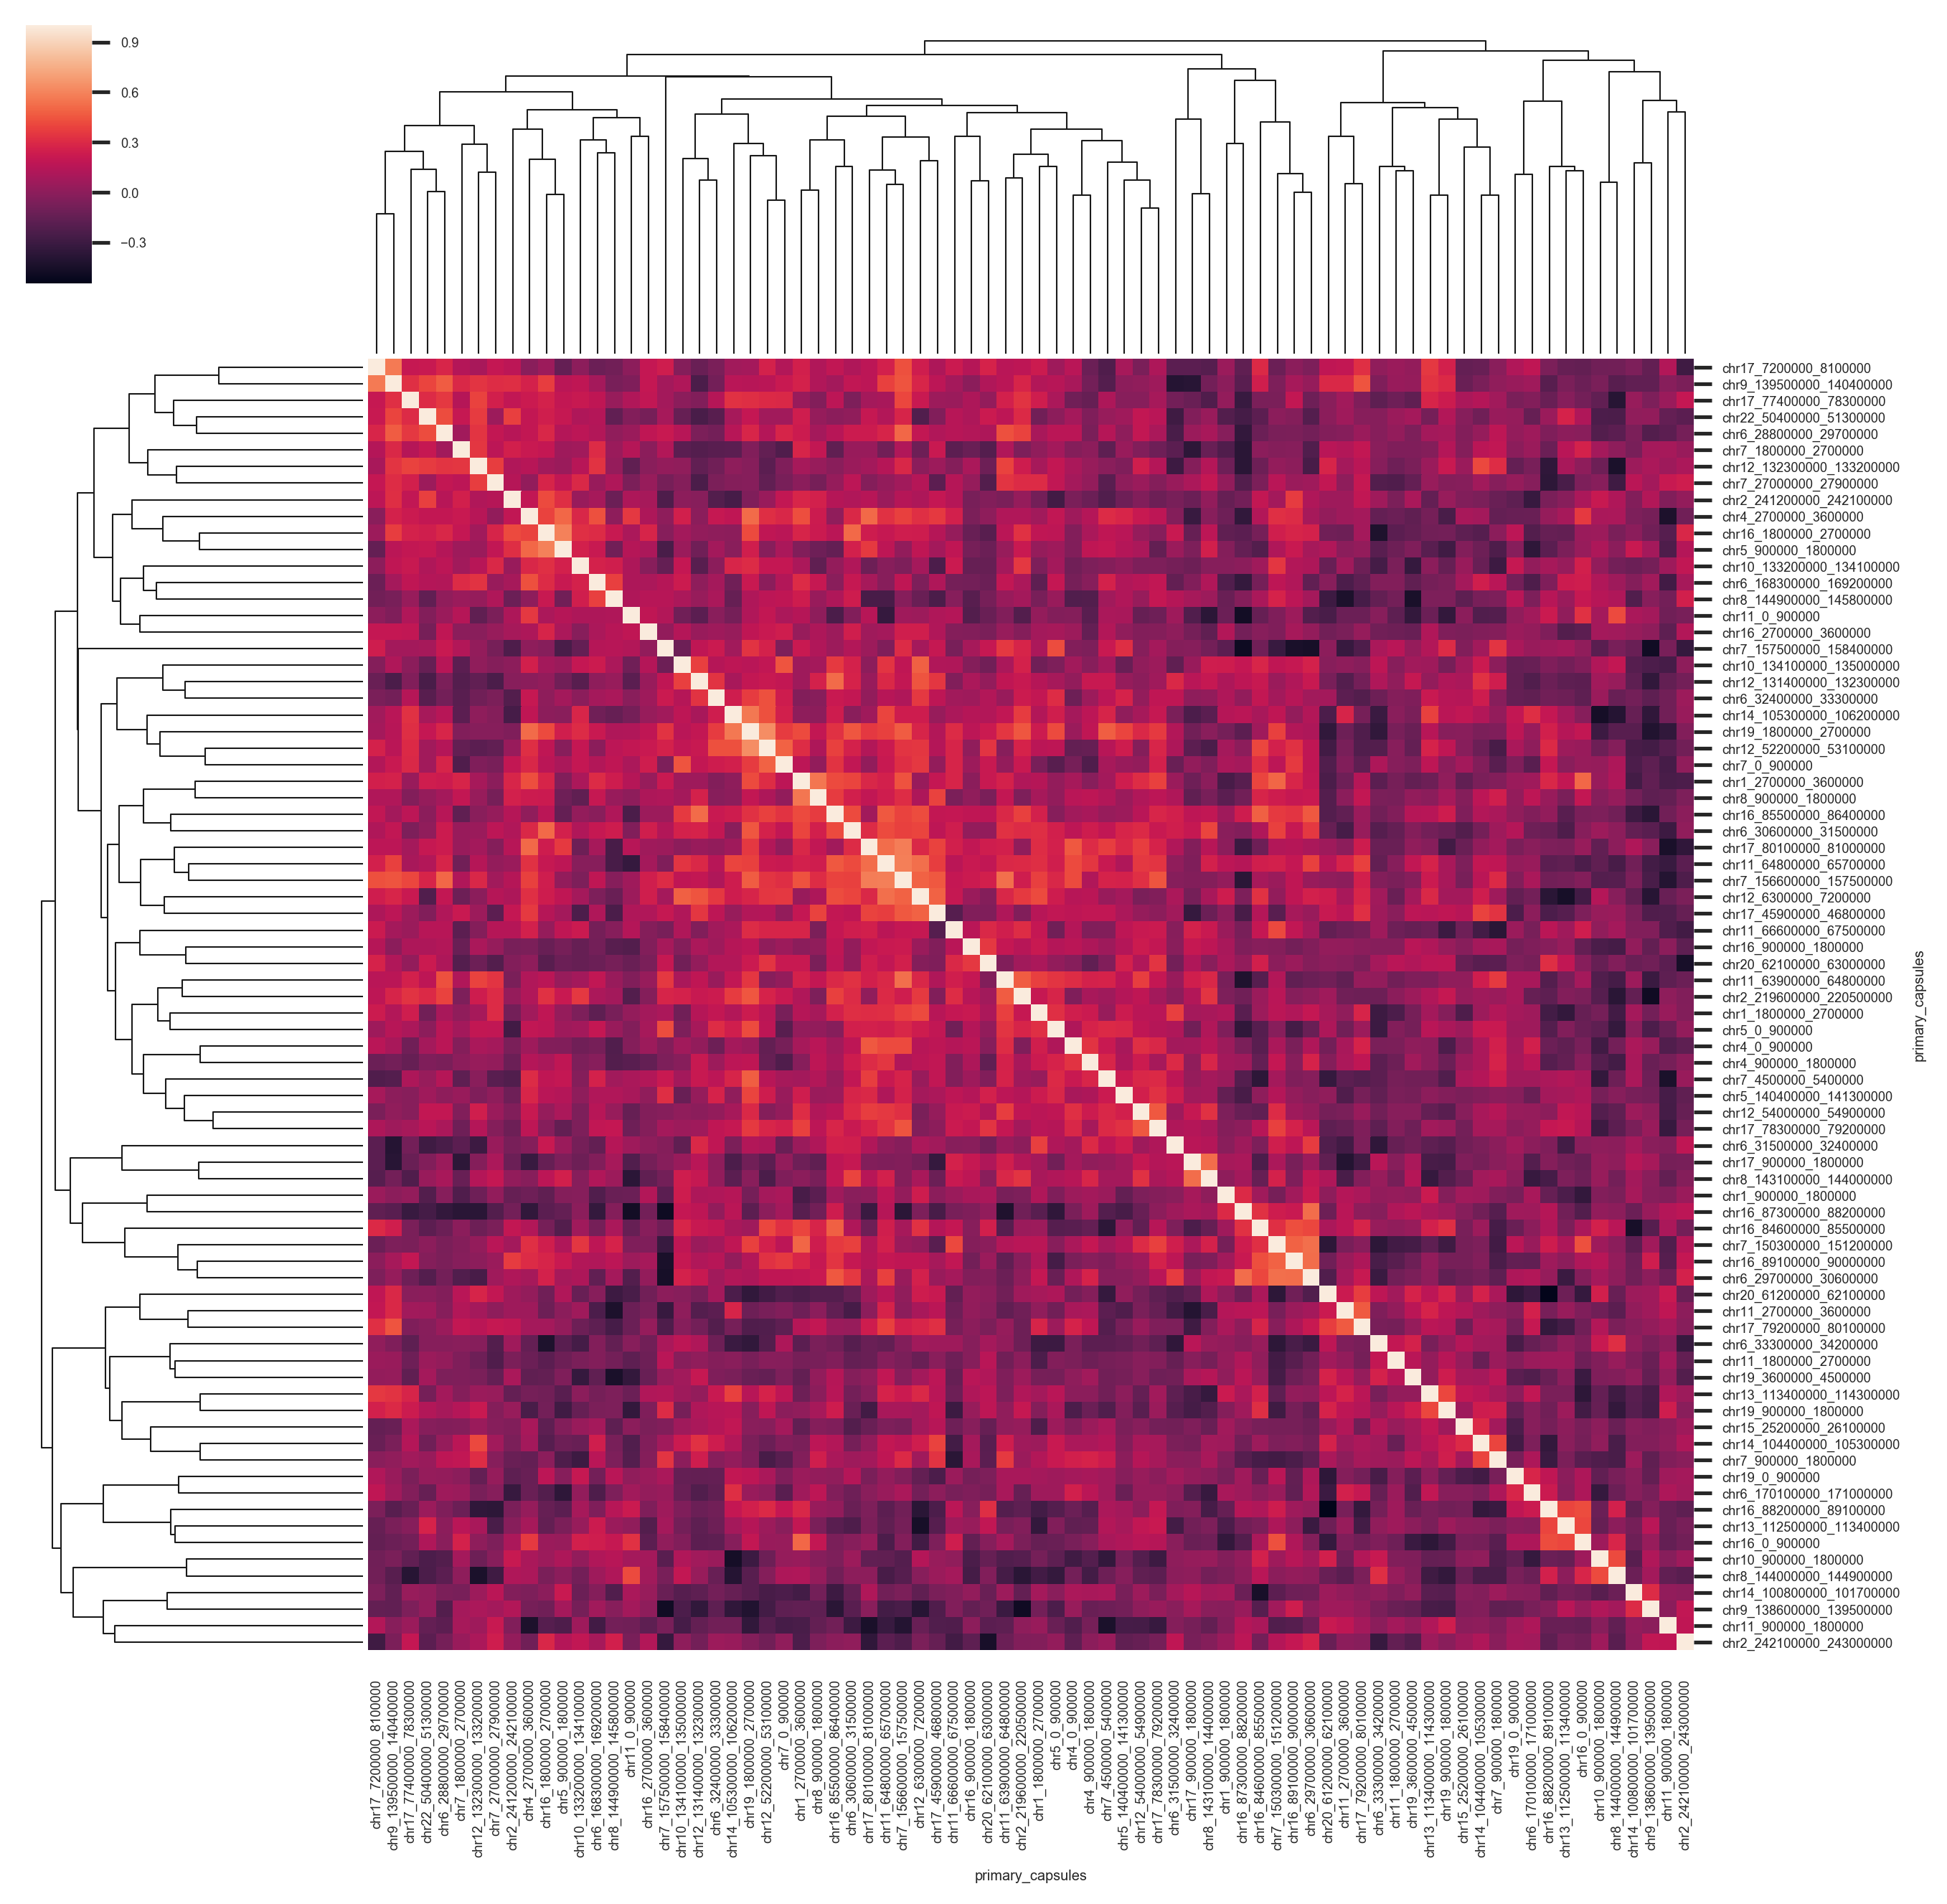

In [225]:
make_graph3(2)

In [301]:
import networkx as nx
def make_graph4(i):
    gr=nx.Graph(G2[i]>0.45)
    df_transform=pd.DataFrame(fruchterman_reingold_layout(gr,dim=3).values(),columns=['x','y','z'])
    df_transform['name']=df_transform.index
    plotter = PlotlyPlot()
    df_transform['color']=nx.betweenness_centrality(gr).values() # instead can replace with significant interaction with output caps
    df_transform['name']=d['embedding_primarycaps_aligned'].coords['primary_capsules']
    plotter.add_plot(df_transform,gr,'color',size=5)
    plotter.plot('net{}_centrality_{}.html'.format(i,d['routing_weights'].coords['output_capsules'].values[y[i]]))
    
    plotter = PlotlyPlot()
    #print(y[i])
    wt=pd.DataFrame(W[i],index=d['routing_weights'].coords['primary_capsules'],columns=d['routing_weights'].coords['output_capsules']).iloc[:,y[i]].values.astype(float)
    #print(wt)
    df_transform['color']=wt##nx.betweenness_centrality(gr).values() # instead can replace with significant interaction with output caps
    df_transform['name']=d['embedding_primarycaps_aligned'].coords['primary_capsules']
    plotter.add_plot(df_transform,gr,'color',size=5)
    plotter.plot('net{}_routing_{}.html'.format(i,d['routing_weights'].coords['output_capsules'].values[y[i]]))
    
    

In [302]:
(y==i).sum()

0

In [298]:
W[y==i]

<xarray.DataArray (sample: 0, primary_capsules: 78, output_capsules: 39)>
array([], shape=(0, 78, 39), dtype=float32)
Coordinates:
  * sample            (sample) object 
  * primary_capsules  (primary_capsules) <U25 'chr1_900000_1800000' ... 'chr9_139500000_140400000'
  * output_capsules   (output_capsules) <U7 'AIDH' 'ANAPA' ... 'SUBEPN'

In [304]:
for i in range(250,280):
    make_graph4(i)

In [181]:
G=np.array([make_graph2(i).values.flatten() for i in range(740)])

In [207]:
network_labels.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [236]:
G3=np.array([make_graph3(i).values.flatten() for i in range(39)])

In [258]:
from networkx import fruchterman_reingold_layout, spectral_layout
import plotly.graph_objs as go
import plotly.offline as py

class PlotlyPlot:
    def __init__(self):
        self.plots=[]
        
    def add_plot(self, t_data_df, G=None, color_col='color', name_col='name', xyz_cols=['x','y','z'], size=2, opacity=1.0):
        plots = []
        x,y,z=tuple(xyz_cols)
        if t_data_df[color_col].dtype == np.float64:
            plots.append(
                go.Scatter3d(x=t_data_df[x], y=t_data_df[y],
                             z=t_data_df[z],
                             name='', mode='markers',
                             marker=dict(color=t_data_df[color_col], size=size, opacity=opacity, colorscale='Viridis',
                             colorbar=dict(title='Colorbar')), text=t_data_df[color_col] if name_col not in list(t_data_df) else t_data_df[name_col]))
        else:
            colors = t_data_df[color_col].unique()
            c = ['hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, len(colors) + 2)]
            color_dict = {name: c[i] for i,name in enumerate(sorted(colors))}
            print(color_dict)
            for name,col in color_dict.items():
                print(name)
                plots.append(
                    go.Scatter3d(x=t_data_df[x][t_data_df[color_col]==name], y=t_data_df[y][t_data_df[color_col]==name],
                                 z=t_data_df[z][t_data_df[color_col]==name],
                                 name=str(name), mode='markers',
                                 marker=dict(color=col, size=size, opacity=opacity), text=t_data_df.index[t_data_df[color_col]==name] if 'name' not in list(t_data_df) else t_data_df[name_col][t_data_df[color_col]==name]))
        if G is not None:
            #pos = nx.spring_layout(G,dim=3,iterations=0,pos={i: tuple(t_data.loc[i,['x','y','z']]) for i in range(len(t_data))})
            Xed, Yed, Zed = [], [], []
            for edge in G.edges():
                if edge[0] in t_data_df.index.values and edge[1] in t_data_df.index.values:
                    Xed += [t_data_df.loc[edge[0],x], t_data_df.loc[edge[1],x], None]
                    Yed += [t_data_df.loc[edge[0],y], t_data_df.loc[edge[1],y], None]
                    Zed += [t_data_df.loc[edge[0],z], t_data_df.loc[edge[1],z], None]
            plots.append(go.Scatter3d(x=Xed,
                      y=Yed,
                      z=Zed,
                      mode='lines',
                      line=go.scatter3d.Line(color='rgb(210,210,210)', width=1),
                      hoverinfo='none'
                      ))
        self.plots.extend(plots)
        
    def plot(self, output_fname, axes_off=False):
        if axes_off:
            fig = go.Figure(data=self.plots,layout=go.Layout(scene=dict(xaxis=dict(title='',autorange=True,showgrid=False,zeroline=False,showline=False,ticks='',showticklabels=False),
                yaxis=dict(title='',autorange=True,showgrid=False,zeroline=False,showline=False,ticks='',showticklabels=False),
                zaxis=dict(title='',autorange=True,showgrid=False,zeroline=False,showline=False,ticks='',showticklabels=False))))
        else:
            fig = go.Figure(data=self.plots)
        py.plot(fig, filename=output_fname, auto_open=False)  

In [257]:
# perhaps concatenating wrong axis???
map_d=pd.Series(np.arange(39)).map(dict(zip(np.arange(39),np.unique(d['routing_weights'].coords['output_capsules'].values))))

Y=pd.DataFrame(PCA(n_components=2,random_state=42).fit_transform(np.vstack(d['embedding_primarycaps_cat'])),columns=['x','y'])
Y.loc[:,'capsule']=pd.Series(d['true']).map(map_d).values #d['embedding_primarycaps_aligned'].coords['primary_capsules']
#sns.scatterplot('x','y',data=Y)
fig=px.scatter(Y,x='x',y='y',color='capsule')
py.plot(fig,filename='embeddings.plot.html')

'embeddings.plot.html'

<Figure size 6000x6000 with 0 Axes>

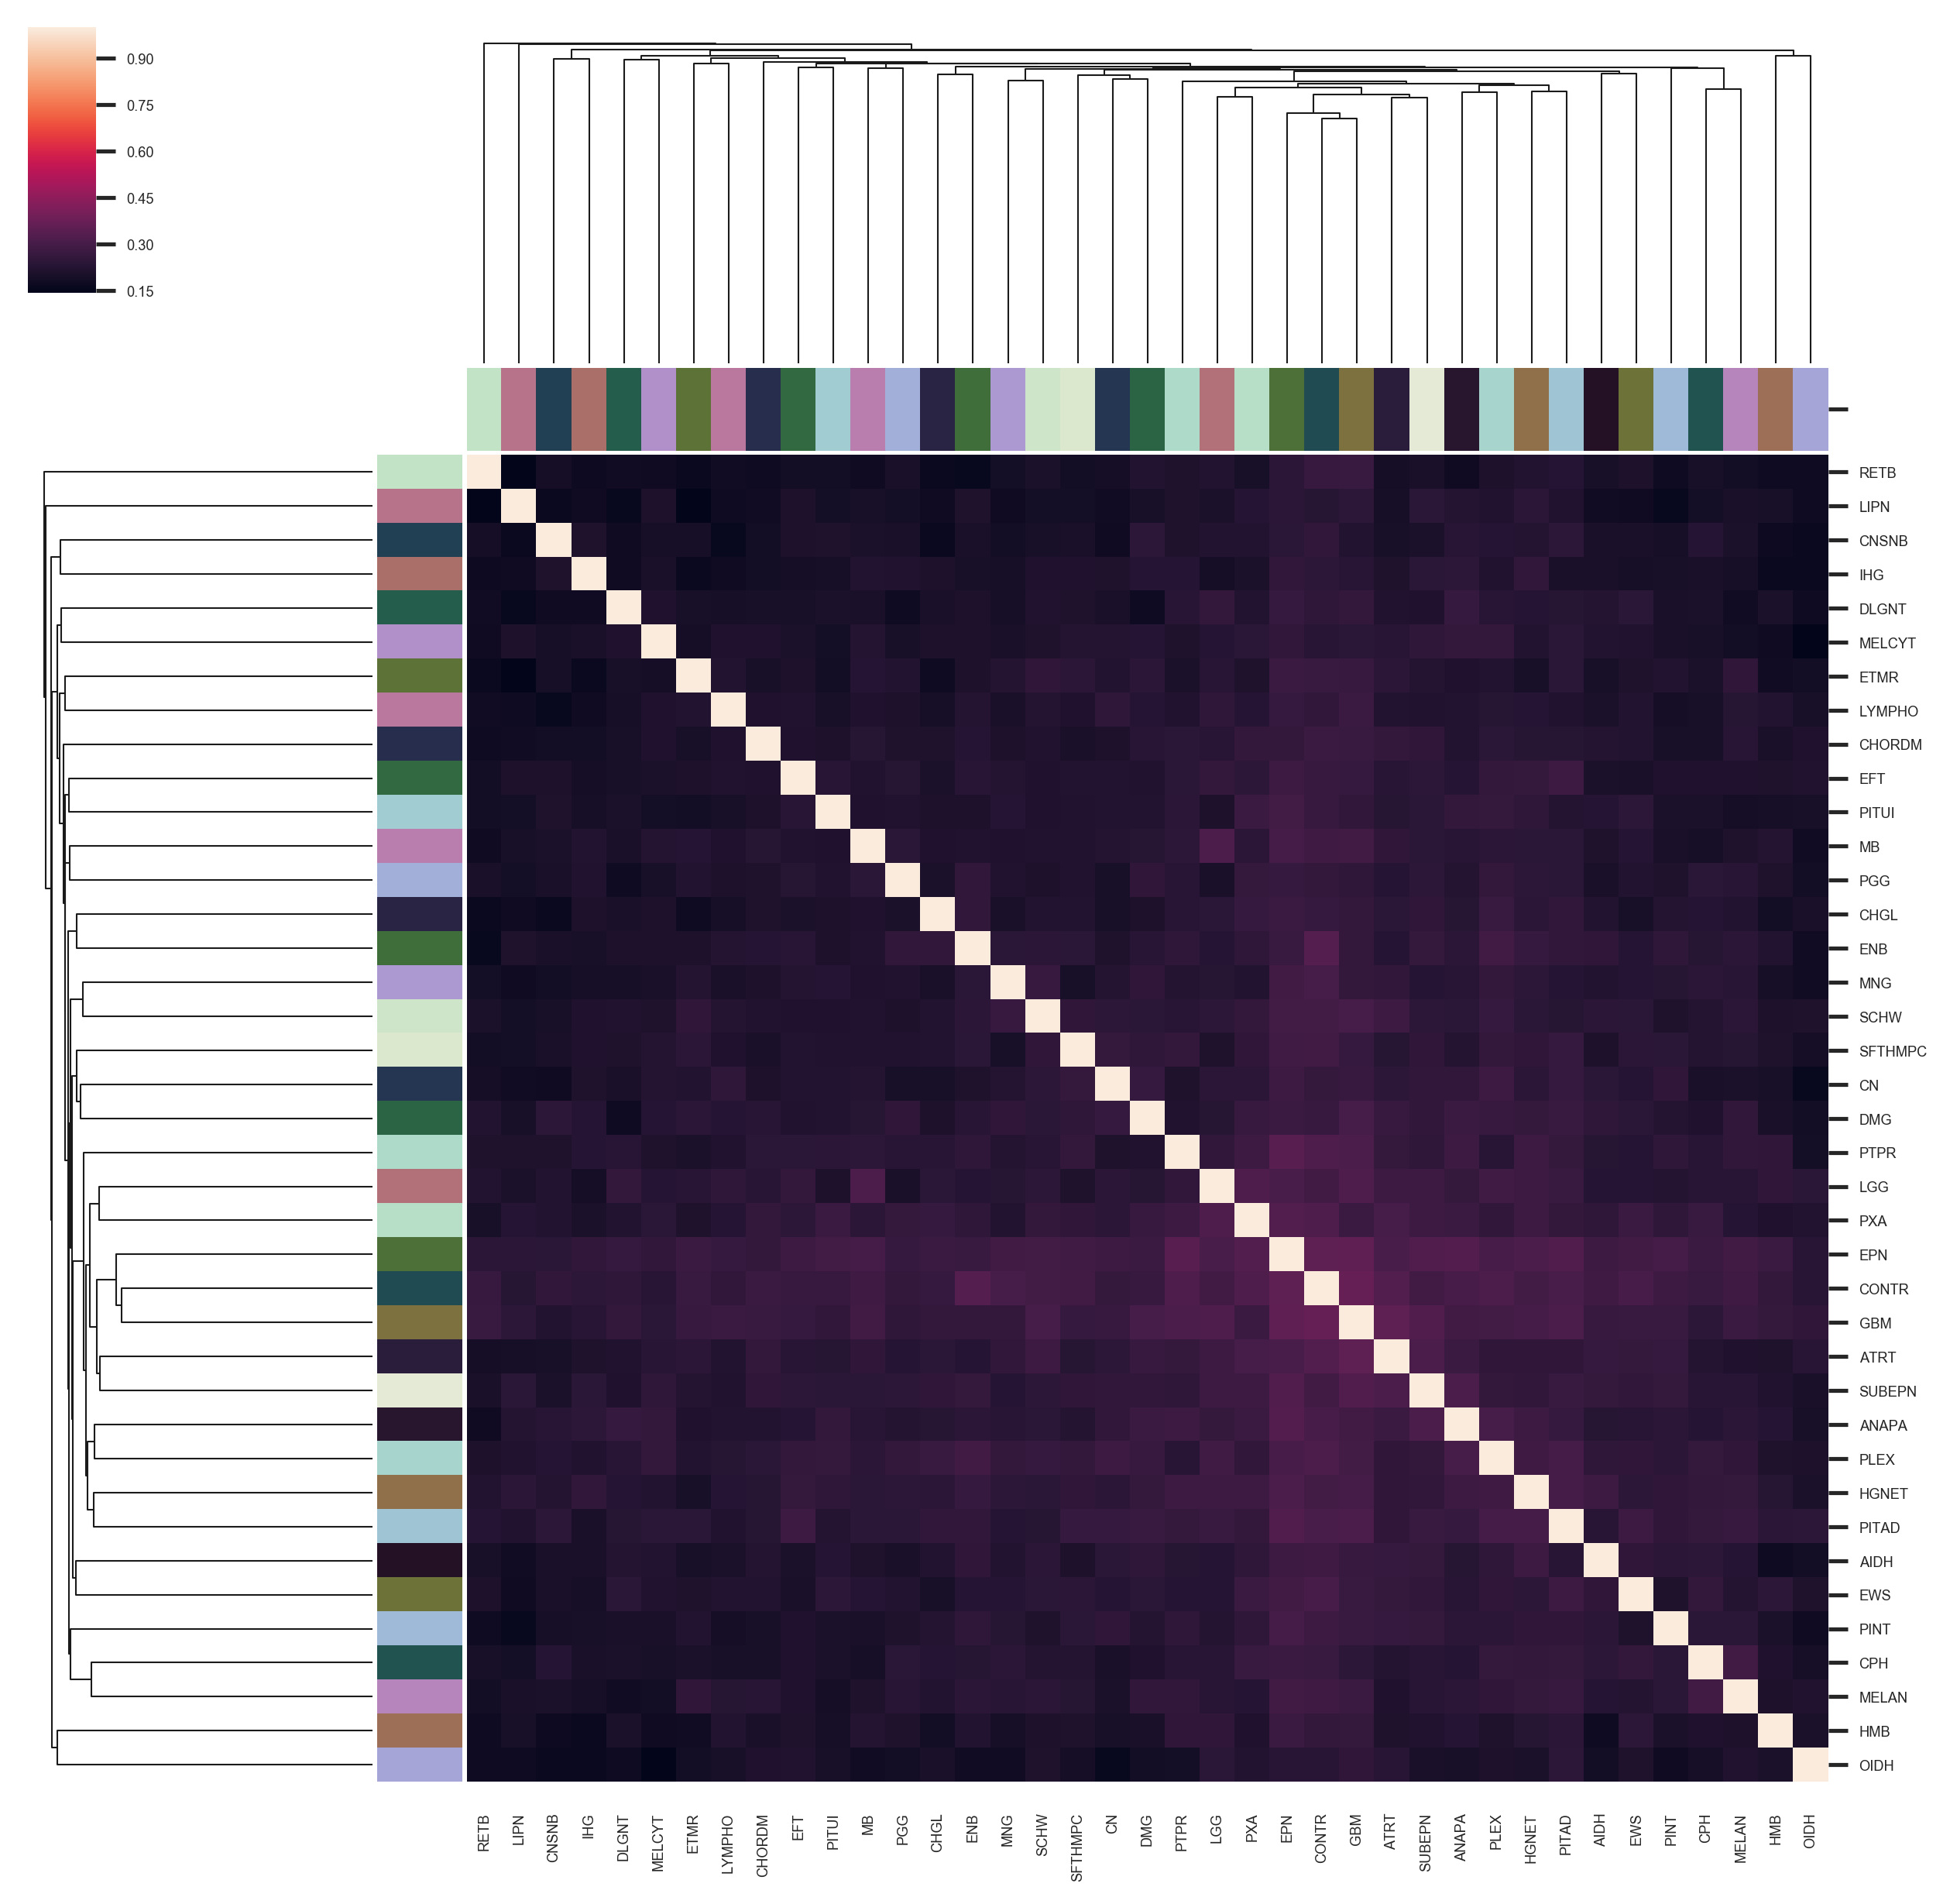

In [241]:
plt.figure(figsize=(20,20))
df=pd.DataFrame(np.corrcoef(G3),index=d['routing_weights'].coords['output_capsules'].values,columns=d['routing_weights'].coords['output_capsules'].values)
network_labels=pd.Series(np.arange(39)).map(dict(zip(np.arange(39),np.unique(d['routing_weights'].coords['output_capsules'].values))))
network_pal = sns.cubehelix_palette(network_labels.unique().size,
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, d['routing_weights'].coords['output_capsules'].values), network_pal))

network_labels.index=d['routing_weights'].coords['output_capsules'].values

network_colors = pd.Series(network_labels).map(network_lut)
g=sns.clustermap(df,row_colors=network_colors, col_colors=network_colors,)
# for label in network_labels.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#                             label=label, linewidth=0)
# g.ax_col_dendrogram.legend(loc="center", ncol=6)
# g.cax.set_position([.15, .2, .03, .45])

<Figure size 6000x6000 with 0 Axes>

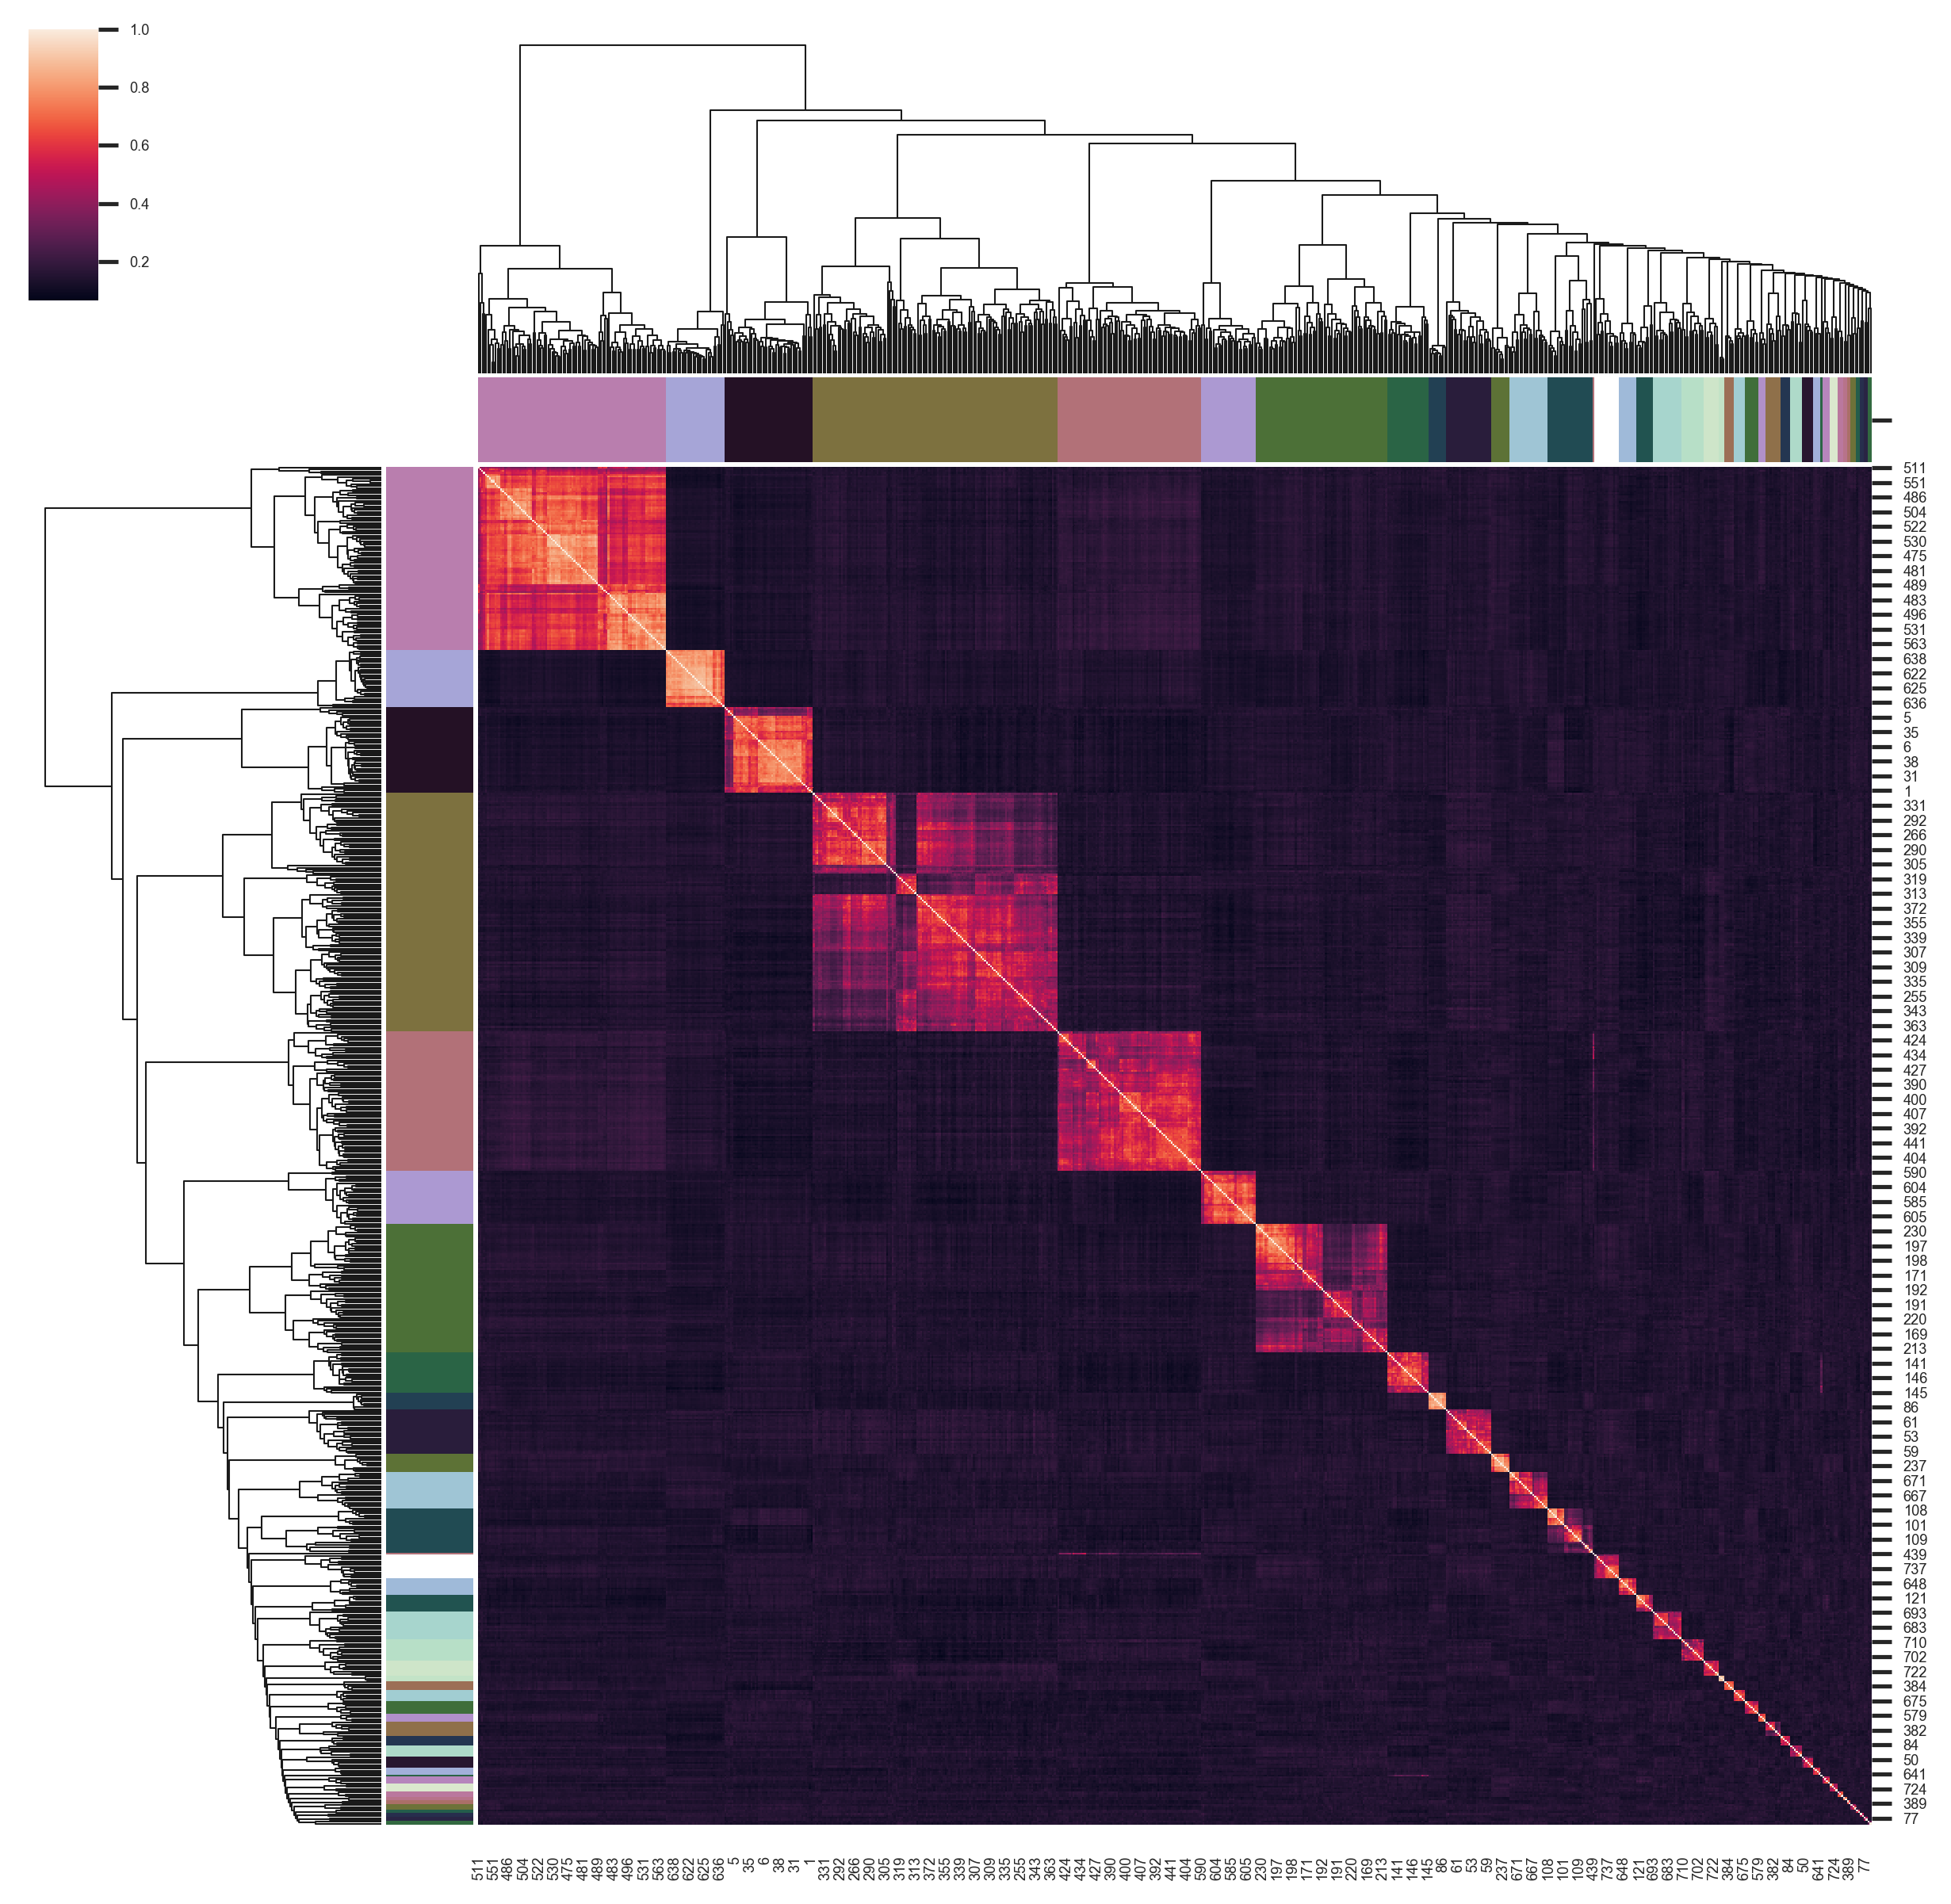

In [214]:
plt.figure(figsize=(20,20))
df=pd.DataFrame(np.corrcoef(G))
network_labels=pd.Series(y).map(dict(zip(np.arange(38),np.unique(d['routing_weights'].coords['output_capsules']))))
network_pal = sns.cubehelix_palette(network_labels.unique().size,
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, network_labels.unique()), network_pal))



network_colors = pd.Series(network_labels).map(network_lut)
g=sns.clustermap(df,row_colors=network_colors, col_colors=network_colors,)
# for label in network_labels.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#                             label=label, linewidth=0)
# g.ax_col_dendrogram.legend(loc="center", ncol=6)
# g.cax.set_position([.15, .2, .03, .45])